In [42]:
# dependecies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# filepath
path_1 = "Data/BicycleSales_2015-20211021_Cleaned.xlsx"
path_2 = "Data/BikeSpecs.xlsx"

# read data
sales_df = pd.read_excel(path_1)
specs_df = pd.read_excel(path_2)

In [44]:
# rename specs Object column to Material
specs1_df = specs_df.rename(columns={"Object":"Material"})

# merge specs into sales data frame
merged_df = pd.merge(sales_df, specs1_df, on="Material", how="left")

In [45]:
# reduce down to necessary columns
reduced_df = merged_df[["Material", "Sold-to pt", "Month", "Invoiced Quantity", 
                        "Product hierarchy.1", "Application_x", "Tire Size", "Ply Construction",
                        "Bead", "Color", "TPI - Threads per inch", "Compound", "Technology"
                       ]]

# rename columns
reduced_df = reduced_df.rename(columns={"Product hierarchy.1":"Product hierarchy",
                                        "Application_x":"Application"})

In [46]:
# split tire size by diameter (before x) and width (after x)
reduced_df[["Diameter", "Width"]] = reduced_df["Tire Size"].str.split("X", n=1, expand=True)

# splite Month into separate month and year components
reduced_df[["Month", "Year"]] = reduced_df["Month"].str.split("/", n=1, expand=True)

In [47]:
# create Date column with reordered Year/Date format
reduced_df["Date"] = reduced_df["Year"] + "/" + reduced_df["Month"]

In [48]:
# strip erroneous text from diameter and width
reduced_df["Diameter"] = reduced_df["Diameter"].str.replace(r'"','')
reduced_df["Width"] = reduced_df["Width"].str.replace(r'"','')

In [49]:
#Displaying Cleaned Dataframe
reduced_df

# Output to excel for review
# reduced_df.to_excel('Output/output.xlsx')

,Material,Sold-to pt,Month,Invoiced Quantity,Product hierarchy,Application,Tire Size,Ply Construction,Bead,Color,TPI - Threads per inch,Compound,Technology,Diameter,Width,Year,Date
0,TB29688100,1025073,01,1,M143 CREEPY CRAWLER,MODIFIED TRIALS,20X2.00,Single Ply,Wire,Black,60,Super Tacky,ST,20,2.00,2015,2015/01
1,TB73301000,1025073,01,6,M147 DTH,URBAN,26X2.30,Single Ply,Foldable,Black,60,Single,,26,2.30,2015,2015/01
2,TB96802000,1025073,01,2,M148 GRIFTER,URBAN,29X2.50,Single Ply,Wire,Black,60,Single,,29,2.50,2015,2015/01
3,TB96651200,1025073,01,2,M149 TORCH,URBAN,29X2.10,Single Ply,Foldable,Black,120,Single,SilkWorm,29,2.10,2015,2015/01
4,TB35790100,1025073,01,0,M151 SNYPER,BMX,20X2.25,Single Ply,Foldable,Black,60,Dual,EXO,20,2.25,2015,2015/01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77561,TB00241300,1035759,10,2,M357RU Dissector,MOUNTAIN,29X2.40,Single Ply,Foldable,Black,60,Dual,EXO/TR,29,2.40,2021,2021/10
77562,TB00200500,1035815,10,1,M2018RU RAMBLER,DIRT ROAD/GRAVEL,700X40,Single Ply,Foldable,Black,60,Dual,SilkShield/TR,700,40,2021,2021/10
77563,TB00241300,1035905,10,2,M357RU Dissector,MOUNTAIN,29X2.40,Single Ply,Foldable,Black,60,Dual,EXO/TR,29,2.40,2021,2021/10
77564,TB91145000,1035908,10,2,M349 Rekon,MOUNTAIN,27.5X2.60,Single Ply,Foldable,Black,120,3C Maxx Terra,3CT/EXO/TR,27.5,2.60,2021,2021/10


In [52]:
# split Technology into individual components (delimited by /) and return new columns for
# Protection (EXO, EXO+, MaxxShield, SilkWorm, SilkShield, DD, DH) and Tubeless Ready (TR)
tech = reduced_df["Technology"].unique()

tech


array(['ST', '   ', 'SilkWorm', 'EXO', 'TR', 'EXO/TR', '3C', '3CS/EXO/TR',
       '3C/EXO', 'MaxxShield', 'SilkShield', '3CT/EXO/TR', 'UST/ST',
       'LUST/UST', 'K2', 'Skinwall', '3C/TR', 'Nylon Breaker',
       '3C/EXO/TR', 'SilkShield/TR/ONE70', 'SilkShield/ONE70',
       'Aramid Inside', 'SilkWorm/ONE70', 'ST/EXO', '3C/K2',
       '3C/MaxxShield', 'SilkShield/eBike', 'Nylon Breaker/ONE70',
       '3C/Skinwall', '3C/TR/DD', 'ONE70', 'MaxxShield/TR',
       'SilkWorm/EXO/TR', '3CG/EXO/TR', '3CG/TR/DD', 'SilkShield/TR',
       'TR/DD', '3CG/TR/DH', '3CT/TR/DD', 'ST/DD', 'SS/TR',
       '3C/SS/EXO/TR', '3CG/TR', '3C/SilkShield', '3CT/EXO+/TR',
       'HYPR/K2', 'K2/SilkWorm', 'HYPR/ONE70/K2/TR', 'EXO/TR/SK',
       'HYPR/ONE70/K2', 'HYPR-S/K2', '3CG/EXO+/TR', 'EXO/TW', 'EXO/TR/TW',
       '3CS/EXO/TR/TW', 'HYPR-S/K2/ONE70/TR', 'EPS', '3CT/EXO/TR/TW', nan],
      dtype=object)

In [66]:
# group by material create a time series for each material for invoiced quantity by month
# diameter_df = reduced_df.groupby(["Diameter"])[["Diameter", "Month", "Invoiced Quantity"]]
# month_df = reduced_df.groupby(["Month"])[["Month", "Invoiced Quantity"]]
date_df = reduced_df.groupby(["Date"], as_index = False)[["Date", "Invoiced Quantity"]].sum()                     
date_df

,Date,Invoiced Quantity
0,2015/01,7210
1,2015/02,11520
2,2015/03,12564
3,2015/04,12648
4,2015/05,19070
...,...,...
77,2021/06,29528
78,2021/07,25659
79,2021/08,27208
80,2021/09,11897


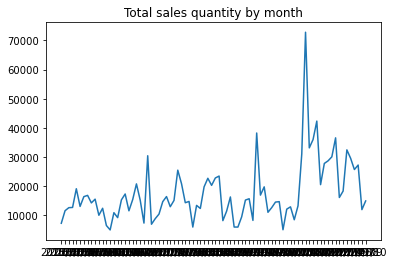

In [67]:
# Prelimiary plot to quickly visualize overall
plt.plot(date_df["Date"], date_df["Invoiced Quantity"])
plt.title("Total sales quantity by month")

plt.show()

In [68]:
# group by year and month then sum invoiced quantity
year_month_df = reduced_df.groupby(["Year", "Month"],
                                   as_index = False)[["Year", "Month", "Invoiced Quantity"]].sum()
year_month_df

,Year,Month,Invoiced Quantity
0,2015,01,7210
1,2015,02,11520
2,2015,03,12564
3,2015,04,12648
4,2015,05,19070
...,...,...,...
77,2021,06,29528
78,2021,07,25659
79,2021,08,27208
80,2021,09,11897


In [69]:
# Find years and months, 
# create a dataframe containing the summed quantities for each date 
# with months in rows and years in columns

years = year_month_df["Year"].unique()
months = {"Month": year_month_df["Month"].unique()}
yearly_df = pd.DataFrame(months)

for each in years:
    df = year_month_df.loc[year_month_df['Year'] == each]
    df = df[["Month","Invoiced Quantity"]]
    df = df.rename(columns={"Invoiced Quantity" : each})
    yearly_df = pd.merge(yearly_df, df, on="Month", how="left" )      

yearly_df

,Month,2015,2016,2017,2018,2019,2020,2021
0,01,7210,6443,6883,13355,9405,12064,30030.0
1,02,11520,4928,8792,12299,15180,12851,36552.0
2,03,12564,10845,10363,19711,15632,8419,16061.0
3,04,12648,9149,14637,22658,8198,13211,18269.0
4,05,19070,15252,16388,20236,38211,31050,32422.0
5,06,12998,17268,12897,22771,16883,72818,29528.0
6,07,16351,11494,15073,23427,19719,33108,25659.0
7,08,16791,15339,25451,8115,10980,35952,27208.0
8,09,14204,20735,20776,11380,12589,42304,11897.0
9,10,15497,15161,14271,16247,14486,20475,14875.0


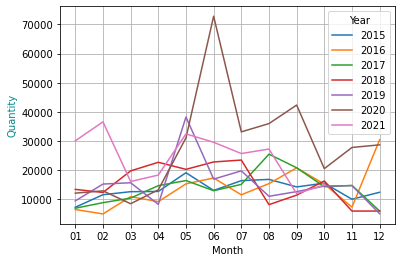

In [70]:
# plot quantity by month for each year
for each in years:
    plt.plot(yearly_df["Month"], yearly_df[each], label = each)

plt.xlabel("Month")
plt.ylabel("Quantity",color = "darkcyan")
plt.legend(title="Year")
plt.grid()
plt.show()

In [75]:
application_df = reduced_df.groupby(["Application","Year"],
                                   as_index = False)[["Application","Year","Invoiced Quantity"]].sum()

years = application_df["Year"].unique()
applications = {"Application": application_df["Application"].unique()}
application_year_df = pd.DataFrame(applications)

for each in years:
    df = application_df.loc[application_df['Year'] == each]
    df = df[["Application","Invoiced Quantity"]]
    df = df.rename(columns={"Invoiced Quantity" : each})
    application_year_df = pd.merge(application_year_df, df, on="Application", how="left" )      

application_year_df

,Application,2015,2016,2017,2018,2019,2020,2021
0,BMX,14526.0,10365.0,8591,6116,4856,7523,6566
1,CYCLOCROSS,1058.0,639.0,1605,1298,1336,893,711
2,DIRT ROAD/GRAVEL,158.0,1257.0,2269,2546,5904,17922,17663
3,DOWNHILL,9902.0,6792.0,6003,9879,7553,13209,8014
4,E BIKE,NaN,NaN,38,47,227,57,28
5,FAT BIKE/PLUS TIRES,4051.0,9196.0,11484,8634,6720,13287,6127
6,HYBRID,3420.0,5142.0,4420,4441,1851,974,1735
7,MODIFIED TRIALS,183.0,193.0,177,134,213,277,310
8,MOUNTAIN,95255.0,103177.0,114649,127527,122379,238279,169624
9,MVS,38.0,11.0,9,38,385,100,316


In [106]:
diameter_df = reduced_df.groupby(["Application","Diameter","Year"],
                                   as_index = False)[["Application","Diameter","Year",
                                                      "Invoiced Quantity"]].sum()

diameter_mountain_df = diameter_df.loc[diameter_df['Application'] == "MOUNTAIN"]

diameter_mountain_df = diameter_mountain_df[["Diameter","Year","Invoiced Quantity"]]

years = diameter_mountain_df["Year"].unique()
diameters = {"Diameter": diameter_mountain_df["Diameter"].unique()}
diameter_year_df = pd.DataFrame(diameters)

for each in years:
    df = diameter_mountain_df.loc[diameter_mountain_df['Year'] == each]
    df = df[["Diameter","Invoiced Quantity"]]
    df = df.rename(columns={"Invoiced Quantity" : each})
    diameter_year_df = pd.merge(diameter_year_df, df, on="Diameter", how="left" )      

diameter_year_df

,Diameter,2015,2016,2017,2018,2019,2020,2021
0,24,496,574,481,918,1720,4499,2375
1,26,20255,20818,9277,8314,9522,13362,5849
2,27.5,29671,40405,47500,49531,44642,78576,42606
3,29,44833,41380,57391,68764,66495,141842,118794


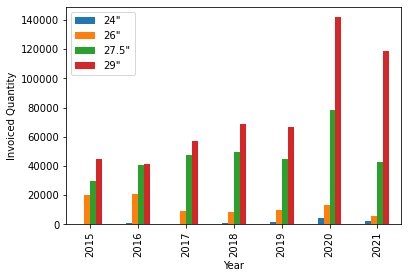

In [136]:
# plot quantity by diameter for each year
#for each in years:
    #plt.plot(diameter_year_df["Diameter"], diameter_year_df[each], label = each)
# diameter_year_df = diameter_year_df.astype(float)
# diameter_year_df.transpose().plot(kind='bar')

ax = diameter_year_df[['2015','2016','2017','2018','2019','2020','2021']].transpose().plot(kind='bar')

plt.xlabel('Year')
plt.ylabel('Invoiced Quantity')
plt.legend(['24"','26"','27.5"','29"'])
plt.show()

In [ ]:
# test 1

In [63]:
#louis test1

,Diameter,2015,2016,2017,2018,2019,2020,2021
0,24,496,574,481,918,1720,4499,2375
1,26,20255,20818,9277,8314,9522,13362,5849
2,27.5,29671,40405,47500,49531,44642,78576,42606
3,29,44833,41380,57391,68764,66495,141842,118794


In [ ]:
#"Please work correctly you piece of shit"
# I can't believe Louis made changes without respecting my authority